# Proyecto Final

In [1]:
#Importar librerías 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import seaborn as sn

# importar clases extra para modelar
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# multivariate imputation
from sklearn.impute import KNNImputer

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

#Mostrar todas las columnas del dataset usando la funcion max_columns
pd.set_option('display.max_columns', None)


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neural_network import MLPRegressor


In [2]:
# constants
PATH = 'data.csv'


# Load data

In [3]:
# Importar dataset

df = pd.read_csv("data.csv", index_col="Date", parse_dates=True)

In [4]:
#Mostrar los primeros n-registros del dataset 

print('Forma:', df.shape)
df.head()

Forma: (1259, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
for var in df.columns:
    if df[var].isnull().sum() > 1:
        print(var, df[var].isnull().sum())

In [6]:
#Tipos de datos
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


# Standardisation 

In [8]:
#Estandarización de la columna  #ESTO SE DEBE HACER FUNCION
Standariza=(df['Open']-df['Open'].mean())/df['Open'].std()
st_open = pd.DataFrame(Standariza)

Standariza2=(df['High']-df['High'].mean())/df['High'].std()
st_high = pd.DataFrame(Standariza2)

Standariza3=(df['Low']-df['Low'].mean())/df['Low'].std()
st_low = pd.DataFrame(Standariza3)

Standariza4=(df['Close']-df['Close'].mean())/df['Close'].std()
st_close = pd.DataFrame(Standariza4)

Standariza5=(df['Adj Close']-df['Adj Close'].mean())/df['Adj Close'].std()
st_Adj = pd.DataFrame(Standariza5)

Standariza6=(df['Volume']-df['Volume'].mean())/df['Volume'].std()
st_volume = pd.DataFrame(Standariza6)


In [9]:
df = pd.concat([st_open, st_high, st_low, st_close, st_Adj, st_volume], axis=1,)

In [10]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,-1.681476,-1.677682,-1.668112,-1.668565,-1.668565,1.615021
2013-01-03,-1.665891,-1.663816,-1.656257,-1.667379,-1.667379,1.346506
2013-01-04,-1.653417,-1.636985,-1.636469,-1.626975,-1.626975,1.882519
2013-01-07,-1.636135,-1.642863,-1.628224,-1.636073,-1.636073,0.548974
2013-01-08,-1.635880,-1.651525,-1.645709,-1.640170,-1.640170,0.573493
...,...,...,...,...,...,...
2017-12-22,2.325369,2.302725,2.357921,2.317488,2.317488,-0.992625
2017-12-26,2.308060,2.279625,2.305041,2.298264,2.298264,-0.989336
2017-12-27,2.304188,2.269718,2.292737,2.256346,2.256346,-0.683564


In [11]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

# Mapa - Selección de caracteristicas

<AxesSubplot:>

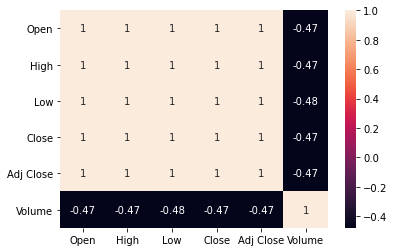

In [12]:
sn.heatmap(df.corr(), annot=True) 

<AxesSubplot:xlabel='Date'>

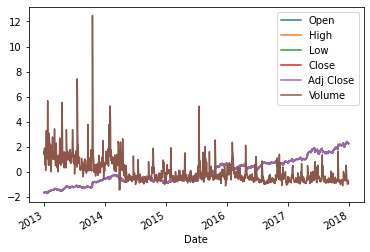

In [13]:
df.plot()

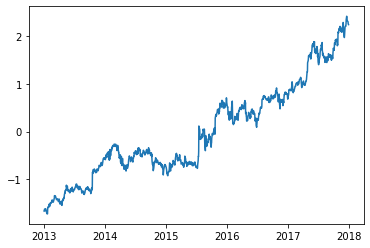

In [14]:
plt.plot(df.groupby(df.index)["Close"].mean())

# KNN imputation

In [15]:
#LIMPIAR LOS DATOS
# 1. Encontrar variables con datos faltantes
for var in df.columns:
    if df[var].isnull().sum() > 1:
        print(var, df[var].isnull().sum())

In [16]:
imputer = KNNImputer(
    n_neighbors=10, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

imputer2 = KNNImputer(
    n_neighbors=1, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

# Hallar X y Y 

In [17]:
#X=df[feature_cols]

#y=df['Open']

# TEST AND TRAIN

In [18]:
# Separar el conjunto de prueba y de text
feature_cols  = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
y = ['Close']
# Soltar el objetivo de la lista de características
#feature.remove('family')
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_cols],  # solo las caracteristicas (features)
    df[y],  # el objetivo (target)
    test_size=0.3,  # el porcentaje de obs en el conjunto de prueba
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((881, 5), (378, 5))

In [19]:
y_train

,Close
Date,
2016-04-13,0.563431
2016-08-05,0.736903
2015-04-22,-0.661149
2014-06-18,-0.581916
2015-06-12,-0.684372
...,...
2016-01-13,0.272453
2016-04-27,0.302484
2017-10-30,2.072864


In [20]:
X_train

,Open,High,Low,Adj Close,Volume
Date,,,,,
2016-04-13,0.549198,0.548637,0.554145,0.563431,-0.423301
2016-08-05,0.689379,0.710899,0.714842,0.736903,-0.367027
2015-04-22,-0.690249,-0.675755,-0.678716,-0.661149,-0.491178
2014-06-18,-0.631004,-0.605471,-0.608979,-0.581916,-0.399739
2015-06-12,-0.689539,-0.704056,-0.671160,-0.684372,-0.872601
...,...,...,...,...,...
2016-01-13,0.444945,0.437442,0.292883,0.272453,0.051892
2016-04-27,0.310800,0.291599,0.257143,0.302484,0.408856
2017-10-30,2.057136,2.080619,2.060668,2.072864,-0.197246


In [21]:
Date4=pd.DataFrame(y_test.index)

In [22]:
imputer.fit(X_train)


KNNImputer(n_neighbors=10, weights='distance')

In [23]:
imputer2.fit(y_train)

KNNImputer(n_neighbors=1, weights='distance')

In [24]:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# sklearn devuelve una matriz Numpy
# hacer un marco de datos
X_train = pd.DataFrame(train_t, columns=X_train.columns)
X_test = pd.DataFrame(test_t, columns=X_test.columns)

X_train.head()


,Open,High,Low,Adj Close,Volume
0,0.549198,0.548637,0.554145,0.563431,-0.423301
1,0.689379,0.710899,0.714842,0.736903,-0.367027
2,-0.690249,-0.675755,-0.678716,-0.661149,-0.491178
3,-0.631004,-0.605471,-0.608979,-0.581916,-0.399739
4,-0.689539,-0.704056,-0.671160,-0.684372,-0.872601


In [25]:
train_y = imputer2.transform(y_train)
test_y = imputer2.transform(y_test)

# sklearn devuelve una matriz Numpy
# hacer un marco de datos
y_train = pd.DataFrame(train_y, columns=y_train.columns)
y_test = pd.DataFrame(test_y, columns=y_test.columns)

y_test.head()

,Close
0,-1.626551
1,-0.856143
2,-1.419730
3,0.599376
4,-1.235880


In [26]:
# 1. Verificar variables con datos faltantes
for var in X_test.columns:
    if X_test[var].isnull().sum() > 1:
        print(var, X_test[var].isnull().sum())

for var in X_train.columns:
    if X_train[var].isnull().sum() > 1:
        print(var, X_train[var].isnull().sum())
        
for var in y_test.columns:
    if y_test[var].isnull().sum() > 1:
        print(var, y_test[var].isnull().sum())        
        
for var in y_train.columns:
    if y_train[var].isnull().sum() > 1:
        print(var, y_train[var].isnull().sum())  

In [27]:
X_test.to_csv(r'C:\Users\Usuario\Desktop\A_Proyecto_Mineria\X_test.csv', index = False)
y_test.to_csv(r'C:\Users\Usuario\Desktop\A_Proyecto_Mineria\y_test.csv', index = False)
X_train.to_csv(r'C:\Users\Usuario\Desktop\A_Proyecto_Mineria\X_train.csv', index = False)
y_train.to_csv(r'C:\Users\Usuario\Desktop\A_Proyecto_Mineria\y_train.csv', index = False)

# Train a Random Forest Classifier Model

In [28]:
feature_cols2  = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

X_train1 = X_train.astype(int)
y_train1 = y_train.astype(int)
X_test1 = X_test.astype(int)
y_test1 = y_test.astype(int)

X=X_train1[feature_cols2]


In [29]:
X.dtypes

Open         int32
High         int32
Low          int32
Adj Close    int32
Volume       int32
dtype: object

In [30]:
RF = RandomForestClassifier(max_depth=7, n_estimators=100)
RF.fit(X_train1, y_train1)
y_pred_RF= RF.predict(X_test1)

df2 = pd.DataFrame()

cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]


df2.loc['Machine Learning Classification Method', 'Details'] = 'Random Forest Classifier'
df2.loc['Train Accuracy', 'Details'] = RF.score(X_train1, y_train1) 
df2.loc['Test Accuracy', 'Details'] = RF.score(X_test1, y_test1)

feature_importances = X.columns[np.argsort(RF.feature_importances_)][-5:]
df2.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[4]
df2.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[3]
df2.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[2]
df2.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[1]
df2.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[0]




df2

<ipython-input-30-12ef844e69d9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train1, y_train1)


,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,1
Test Accuracy,1
Top 1 Feature Predictor,Adj Close
Top 2 Feature Predictor,Low
Top 3 Feature Predictor,High
Top 4 Feature Predictor,Open
Top 5 Feature Predictor,Volume


# SVR (Support Vector Regression Model)

In [31]:
#Instanciar el modelo 
SVR_model1 = SVR(kernel='linear', C=0.1, gamma='scale')

SVR_model1


SVR(C=0.1, kernel='linear')

In [32]:
SVR_model1.fit(X_train, y_train)


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=0.1, kernel='linear')

In [33]:
y_pred=SVR_model1.predict(X_test)

In [34]:
#calcular el RMSE (Raíz del error cuadrático medio)(Root Mean Squared Error)
#calcular el RMSE (Raíz del error cuadrático medio)(Root Mean Squared Error)
dfSVR = pd.DataFrame()
dfSVR.loc['Machine Learning Regression Method', 
       'Details'] = 'SVR'
MSE2 = dfSVR.loc['MSE', 'Details'] = metrics.mean_squared_error(y_test, y_pred) 
RMSE2 = dfSVR.loc['RMSE', 'Details'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE2 = dfSVR.loc['MAE', 'Details'] = mean_absolute_error(y_test, y_pred)
display(dfSVR)

,Details
Machine Learning Regression Method,SVR
MSE,0.00109158
RMSE,0.033039
MAE,0.0269456


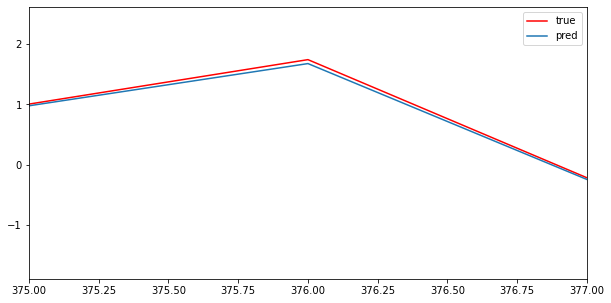

In [35]:
plt.figure(figsize=(10,5))
plt.xlim([375,377])
#plt.ylim([,379])
plt.plot(y_test, label='true', color="red")
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()

In [36]:
#(RMSE) mide la cantidad de error 
#que hay entre dos conjuntos de datos. 
#En otras palabras, compara un valor predicho 
#y un valor observado o conocido. 

# MLPRegressor (Multi-layer Perceptron)

In [37]:
net = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic')

#Crear MLP Regressor
net.solver = 'lbfgs'
net.max_iter=10000

# Entrenar la red
net.fit(X_train, y_train)

#Predecir la red de salida

y_predict = net.predict(X_test)

#Gráficar valores predichos


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [38]:
#calcular el RMSE (Raíz del error cuadrático medio)(Root Mean Squared Error)
dfMLP = pd.DataFrame()
dfMLP.loc['Machine Learning Regression Method', 
       'Details'] = 'MLPRegressor'
MSE3 = dfMLP.loc['MSE', 'Details'] = metrics.mean_squared_error(y_test, y_predict) 
RMSE3 = dfMLP.loc['RMSE', 'Details'] = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
MAE3 = dfMLP.loc['MAE', 'Details'] = mean_absolute_error(y_test, y_predict)
display(dfMLP)

,Details
Machine Learning Regression Method,MLPRegressor
MSE,0.000249519
RMSE,0.0157962
MAE,0.0122015


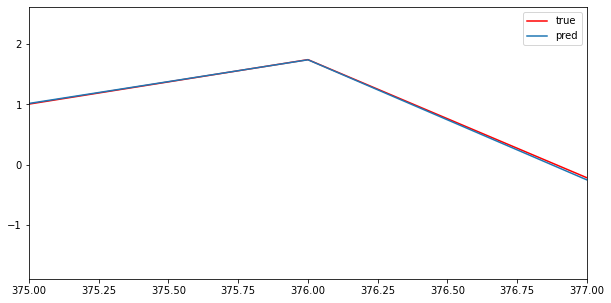

In [39]:
plt.figure(figsize=(10,5))
plt.xlim([375,377])
#plt.ylim([,379])
plt.plot(y_test, label='true', color="red")
plt.plot(y_predict, label='pred')
plt.legend()
plt.show()

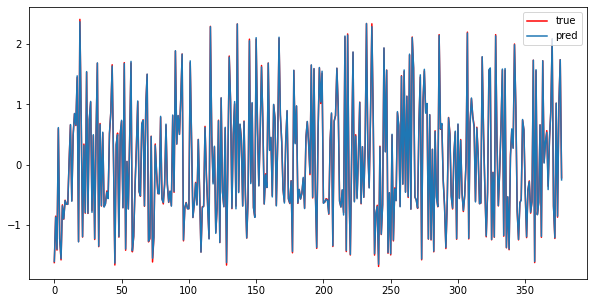

In [40]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label='true', color="red")
plt.plot(y_predict, label='pred')
plt.legend()
plt.show()

# Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0, max_depth = 2)
model.fit(X_train, y_train)


y_tree = model.predict(X_test)


In [42]:
#calcular el RMSE (Raíz del error cuadrático medio)(Root Mean Squared Error)
dfMLP = pd.DataFrame()
dfMLP.loc['Machine Learning Regression Method', 
       'Details'] = 'Decision Tree Regressor'
MSE1 = dfMLP.loc['MSE', 'Details'] = metrics.mean_squared_error(y_test, y_tree) 
RMSE1 = dfMLP.loc['RMSE', 'Details'] = np.sqrt(metrics.mean_squared_error(y_test, 
                                                                y_tree))
MAE1 = dfMLP.loc['MAE', 'Details'] = mean_absolute_error(y_test, y_tree)
display(dfMLP)


,Details
Machine Learning Regression Method,Decision Tree Regressor
MSE,0.0545709
RMSE,0.233604
MAE,0.187546


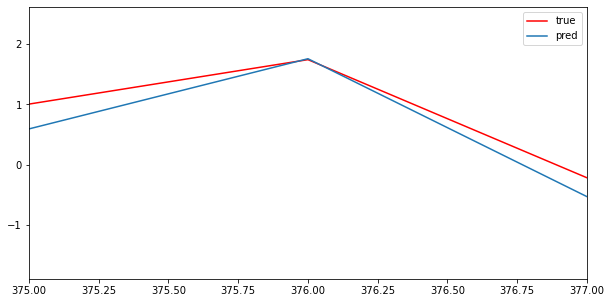

In [43]:
plt.figure(figsize=(10,5))
plt.xlim([375,377])
plt.plot(y_test, label='true', color="red")
plt.plot(y_tree, label='pred')
plt.legend()
plt.show()

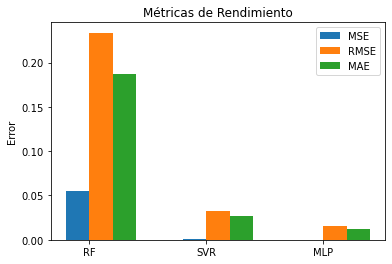

In [45]:
#Gráfica de Métricas
etiquetas = ['RF', 'SVR', 'MLP']
valores = [MSE1, MSE2, MSE3]
valores2 = [RMSE1, RMSE2, RMSE3]
valores3 = [MAE1, MAE2, MAE3]

co = np.arange(len(valores3))
an = 0.20

fig, ax = plt.subplots()
ax.bar(co - an/2, valores, an, label='MSE')
ax.bar(co + an/2, valores2, an, label='RMSE')
ax.bar(co + an*3/2, valores3, an, label='MAE')

ax.set_title('Métricas de Rendimiento')
ax.set_ylabel('Error')
ax.set_xticks(co)
ax.set_xticklabels(etiquetas)
plt.legend()